In [20]:
from sklearn import ensemble, cross_validation, learning_curve, metrics

import numpy as np
import pandas as pd

In [21]:
triplexes = pd.read_csv('basetriples.csv', header=0, sep='\t')

In [9]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,110,R.4SU.8.R.C.11.R.G.15.,-_-_-,11.88_20.1_12.32,0,1,0,0,1,...,1,0,0,0,1,0,0,9,1,0
1,1b23.cif1_R,110,R.A.9.R.A.13.R.C.62.,tHW_-_-,11.7_27.0_26.22,0,0,1,0,0,...,0,0,0,0,0,0,0,7,1,0
2,1b23.cif1_R,111,R.4SU.8.R.A.14.R.A.46.,tWH_t.W_cSS,10.04_12.76_4.86,0,0,1,0,0,...,0,0,0,0,0,0,0,5,1,1
3,1b23.cif1_R,111,R.4SU.8.R.G.15.R.G.48.,-_t.W_cSS,12.32_13.49_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,1
4,1b23.cif1_R,111,R.A.9.R.A.13.R.A.22.,tHW_tSH_-,11.7_10.01_13.84,0,0,1,1,0,...,0,0,0,0,0,0,0,4,0,1


In [22]:
triplexes.shape

(34415, 477)

In [11]:
triplexes.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5', 'fl3p5',
       'fed3p5', 'istriple'],
      dtype='object', length=477)

In [12]:
#целевая переменная
triplex_target = triplexes.istriple.values

In [14]:
triplex_target, len(triplex_target)

(array([0, 0, 1, ..., 0, 1, 0], dtype=int64), 34415)

In [18]:
print('triplex = 1: {:.2f}\ntriplex = 0: {:.2f}'.format(sum(triplex_target)/float(len(triplex_target)), 
                                                       1.0 - sum(triplex_target)/float(len(triplex_target))))

triplex = 1: 0.15
triplex = 0: 0.85


In [23]:
from collections import Counter
Counter(list(triplexes.pdb_chain.values))
#print(list(triplexes.pdb_chain.values))

Counter({'1b23.cif1_R': 19,
         '1c0a.cif1_B': 38,
         '1e8o.cif1_E': 2,
         '1et4.cif1_A': 15,
         '1evv.cif1_A': 23,
         '1f1t.cif1_A': 8,
         '1f7u.cif1_B': 11,
         '1fir.cif1_A': 25,
         '1gax.cif1_D': 19,
         '1h3e.cif1_B': 10,
         '1h4s.cif1_T': 33,
         '1hc8.cif1_C': 16,
         '1i6u.cif1_C': 12,
         '1il2.cif1_C': 22,
         '1j1u.cif1_B': 27,
         '1j2b.cif1_C': 4,
         '1kh6.cif1_A': 3,
         '1kog.cif1_O': 14,
         '1kuq.cif1_B': 8,
         '1kxk.cif1_A': 7,
         '1l2x.cif1_A': 5,
         '1mfq.cif1_A': 32,
         '1mji.cif1_D': 15,
         '1mms.cif1_C': 17,
         '1mzp.cif1_B': 19,
         '1n78.cif1_C': 24,
         '1nbs.cif1_B': 67,
         '1q96.cif1_A': 2,
         '1qf6.cif1_B': 26,
         '1qtq.cif1_B': 25,
         '1qu2.cif1_T': 19,
         '1s03.cif1_B': 5,
         '1s03.cif1_A': 14,
         '1ser.cif1_T': 20,
         '1u0b.cif1_A': 26,
         '1u6b.cif1_B': 70,
 

In [25]:
triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [30]:
triplexes_data[:1]

,same12,local12,longrange12,same23,local23,longrange23,same13,local13,longrange13,a1m5,...,u3p5,s3p5,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5
0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,9


In [21]:
# разбиение на train и test простое (не используем)
from sklearn import cross_validation

In [29]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(triplexes_data, triplexes_target, test_size=0.3, )

In [1]:
from sklearn.model_selection import GroupShuffleSplit

In [31]:
#разбиваем выборки по группам pdb_chain

gss = GroupShuffleSplit(n_splits=1, test_size=0.3)
train_dataset,test_dataset = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))


In [33]:
train_dataset.shape

(24338,)

In [41]:
#обучающая и тестовая выборки

check_train = triplexes.loc[list(train_dataset)]
check_test = triplexes.loc[list(test_dataset)]

In [50]:
target_train = check_train.istriple.values
target_test = check_test.istriple.values


In [55]:
check_train = check_train.drop('istriple', axis=1)

In [57]:
check_test = check_test.drop('istriple', axis=1)

In [56]:
check_train.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       's3p5', 'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5',
       'fl3p5', 'fed3p5'],
      dtype='object', length=476)

In [44]:
#middle check of shuffle
a = Counter(list(check_train.pdb_chain.values))
b = Counter(list(check_test.pdb_chain.values))

In [61]:
#check_train - target train
#check_test - target_test
check_train = check_train.iloc[:, 5:475]
check_test = check_test.iloc[:, 5:475]

# Модель RandomForestClassifier

In [83]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=15, random_state=1)

In [84]:
rf_classifier.fit(check_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [85]:
prediction_result = rf_classifier.predict(check_test)

In [70]:
from sklearn.metrics import classification_report, accuracy_score

In [86]:
print(classification_report(target_test, prediction_result))
print(accuracy_score(target_test, prediction_result))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      8593
          1       0.92      0.84      0.88      1484

avg / total       0.97      0.97      0.97     10077

0.9662597995435149


In [95]:
from matplotlib import pyplot as plt

In [88]:
from sklearn.metrics import confusion_matrix
df_confusion = pd.crosstab(target_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [96]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

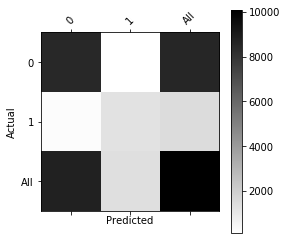

In [97]:
plot_confusion_matrix(df_confusion)